# Caso de detección de pulsares

La detección de pulsares recoge una vasta cantidad de datos que aparentemente pueden corresponder o no a pulsares. En numerosas ocasiones se puede detectar erroneamente el ruido o señales de interferencia como pulsa. Para facilitar la tarea de clasificiación se pueden utilizar las tecnicas de Machine Learning

Este trabajo ha sido realizado por Rafael Rodriguez Garcia y Antonio Ramón Vázquez Ramírez utilizando el conjunto de datos extraido de Kaggle: Predicting Pulsar Star

### Cargar librerias y datos

Importamos las librerias

In [1]:
import pandas as pd
import numpy as np

Establecemos una ruta hacia los archivos y guardamos los datos en unas nueva variable que represente el marco de datos "DataFrame"

In [2]:
df_path= 'pulsar_data.csv'
df=pd.read_csv(df_path)

Abrimos los datos en una tabla y creamos otra tabla con el metodo .describe()

El dataframe que representa a nuestro conjunto de datos tiene 12528 filas y 9 columnas

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


Respecto a target_class (Si la instancia se corresponde a un pulsar o no) tenemos que el valor medio es 0.09 con una desviación estandar de 0.29, por lo que ya podemos intuir que la mayoría de las instancias se corresponderán con la clase= no pulsar (0)

### Preprocesado de datos

Renombramos los atributos con descripciones
Además, guardamos los nombres iniciales de las columnas en otra variable por si pudieran necesitarse en otro momento

In [5]:
columnas_originales = df.columns
columnas_originales

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
columnas= ['media_perfil','desv_est_perfil','curtosis_perfil',
                  'oblicuidad_perfil','media_DMSNR','desv_est_DMSNR',
                 'curtosis_DMSNR','oblicuidad_DMSNR','resultado']

In [7]:
df.columns=columnas
df

,media_perfil,desv_est_perfil,curtosis_perfil,oblicuidad_perfil,media_DMSNR,desv_est_DMSNR,curtosis_DMSNR,oblicuidad_DMSNR,resultado
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


Guardamos en una variable las columnas que representan los atributos, es decir, los datos que se utilizarán para la clasificación y en otra las posibles clases (en este caso 1 y 0)

In [8]:
atributos = columnas[0:8]
atributos

['media_perfil',
 'desv_est_perfil',
 'curtosis_perfil',
 'oblicuidad_perfil',
 'media_DMSNR',
 'desv_est_DMSNR',
 'curtosis_DMSNR',
 'oblicuidad_DMSNR']

In [9]:
valores_clasificacion=df.resultado.unique()
valores_clasificacion

array([0., 1.])

Analizamos que atributos tienen valores nulos, determinamos el porcentaje de valores nulos en cada columna y hacemos una lista con el nombre de estos atributos

In [10]:
df.isnull().sum()

media_perfil            0
desv_est_perfil         0
curtosis_perfil      1735
oblicuidad_perfil       0
media_DMSNR             0
desv_est_DMSNR       1178
curtosis_DMSNR          0
oblicuidad_DMSNR      625
resultado               0
dtype: int64

In [11]:
df.isnull().sum()/len(df) * 100

media_perfil          0.000000
desv_est_perfil       0.000000
curtosis_perfil      13.848978
oblicuidad_perfil     0.000000
media_DMSNR           0.000000
desv_est_DMSNR        9.402937
curtosis_DMSNR        0.000000
oblicuidad_DMSNR      4.988825
resultado             0.000000
dtype: float64

In [12]:
columnas_con_nulos = [col for col in df.columns
                     if df[col].isnull().any()]
print(columnas_con_nulos)

['curtosis_perfil', 'desv_est_DMSNR', 'oblicuidad_DMSNR']


#### Tratamiento de valores nulos

Ahora tenemos un problema, ¿Que hacemos con los valores que nos faltan? 

podriamos retirar estas filas y seguir el trabajo solamente con el resto de filas pero entoces perderiamos el resto de información contenida en estas columnas. hay varias aproximaciones a esta respuesta y en función del problema una opción es más conveniente que otra,

Si se decide rellenar el valor que falta con algún otro evidentemente debemos seguir un criterio. Algunos de estos criterios son rellenar con el valor medio o el valor más repetido. En esta ocasión modificaremos los valores nulos por el valor medio de cada columna

Desarollamos un método para modificar los valores nulos por el valor medio. 

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
my_imputer = SimpleImputer()
df_2 = pd.DataFrame(my_imputer.fit_transform(df))

Cargamos los datos y comprobamos que ya no tenemos valores nulos. Al usar "SimpleImputer" es posible que se hayan eliminado el nombre de las columnas, en este caso podemos volver a asignarlas desde la variable que creamos anteriormente que contenia los nombres de cada columna

In [15]:
df_2.columns = df.columns
df_2.isnull().sum()

media_perfil         0
desv_est_perfil      0
curtosis_perfil      0
oblicuidad_perfil    0
media_DMSNR          0
desv_est_DMSNR       0
curtosis_DMSNR       0
oblicuidad_DMSNR     0
resultado            0
dtype: int64

### Predicción de Valores nulos

Existen otros métodos de imputación. Puede ser interesante realizar una predicción de los valores nulos. Es decir, tratarlos cómo la variable objetivo y entrenar un módelo para predecir estos valores

Podemos utilizar un imputer basado en el algoritmo de K vecinos más cercanos (KNN). La ventaja de este método es que preserva la variablidad de los datos , ya que  cada valor nulo se predice ( no se sustituye por un valor genérico como la media). La idea del método es calcular la distancia de un elemento con valores nulos a todos los demás elementos. Para predecir el valor nulo calcula la media de los k vecinos más cercanos  para ese valor .
La idea principal es que los valores nulos no tengan contribución al cálculo de distancia. Un ejemplo de juguete teniendo 3 vectores: 

\begin{equation}
v_1=(1, 2 ,nan)  \\
v_2=(3, 4, 5)  \\
v_3= (5, 3, 2)
\end{equation}

La distancia del vector 1 al 2 (utilizando la distancia euclídea por defecto):
\begin{equation}
d_{12} = \sqrt{(3-1)^2 +(4-2) ^2 +(5-nan)^2 }= \sqrt{(3-1)^2 +(4-2) ^2 + 0 } = \sqrt{8}
\end{equation}

\begin{equation}
d_{13} = \sqrt{4^2+ 1}= \sqrt{17} 
\end{equation}

El vecino más cercano a 1 es 2 , si sólo buscamos un vecino más cercano se sustituye el valor nulo por el del vecino:

\begin{equation}
v_1=(1, 2 ,5) 
\end{equation}
Si se establece el valor de búsqueda k en un valor mayor a 1 se realiza el promedio de los k vecinos más cercanos para ese valor


In [16]:
# Definimos un objeto de la clase knn imputer
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors = 4)

# Entrenamos el imputerknn
df_knn = pd.DataFrame( imputer_knn.fit_transform( X = df[columnas[:-1]] , y = df[columnas[-1] ] ) )


In [17]:
# Volvemos a poner nombre de las columnas y añadimos la columna de predicciones
df_knn.columns = df.columns[:-1]
df_knn['resultado'] = df['resultado']
df_knn.describe()

,media_perfil,desv_est_perfil,curtosis_perfil,oblicuidad_perfil,media_DMSNR,desv_est_DMSNR,curtosis_DMSNR,oblicuidad_DMSNR,resultado
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.480069,1.778431,12.674758,26.296908,8.333489,105.686722,0.092034
std,25.672828,6.801077,1.064089,6.208450,29.613230,19.502943,4.535783,107.135738,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.028090,-0.188142,1.910535,14.444640,5.803063,35.514450,0.000000
50%,115.183594,46.931022,0.224497,0.203317,2.792642,18.390535,8.451097,83.405724,0.000000
75%,127.109375,50.979103,0.469690,0.932374,5.413253,28.217373,10.727927,140.187831,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [18]:
df_knn.isnull().sum()

media_perfil         0
desv_est_perfil      0
curtosis_perfil      0
oblicuidad_perfil    0
media_DMSNR          0
desv_est_DMSNR       0
curtosis_DMSNR       0
oblicuidad_DMSNR     0
resultado            0
dtype: int64

El analisis a continuación ha sido realizado por defecto para el conjunto de datos con valores imputados mediante media y todas las explicaciones dadas estan basadas en este conjunto de datos. Tras completar este analisis y obtener los parametros del modelo final, se entrenará otro modelo con los mismos parametros sobre el conjunto de datos imputado con KNN para comparar resultados.

Sin embargo si se desea realizar el analisis completo sobre el conjunto de datos imputado con KNN, en la siguiente ventana de código se debe modificar la variable utilizar_knn por True

In [19]:
#Cambiar si quieres utilizar knn o media para el analisis
Utilizar_knn= False

if Utilizar_knn:
    df_2 = df_knn

    
x_data, y_data, x_names, y_names = \
    df_2.iloc[:,0:8], df_2['resultado'], atributos, valores_clasificacion

### Representación

A veces la representación gráfica de nuestros datos puede ayudarnos a visualizar su estructura y obtener información sobre los mismos. Si encontramos ciertas relaciones entre estos datos podremos hacer un mejor analisis. Para esto mismo vamos a realizar el siguiente procedimiento

Separamos conjunto de datos en dos partes, una correspondiente a los atributos y otra correspondiente a las clases. Se debe obtener la tabla original sin los valores de clasificiación y una lista con los valores para cada instancia.

Mediante el metodo .scatter_matrix() se pueden representar los datos y estudiar las relaciones que hay entre estos

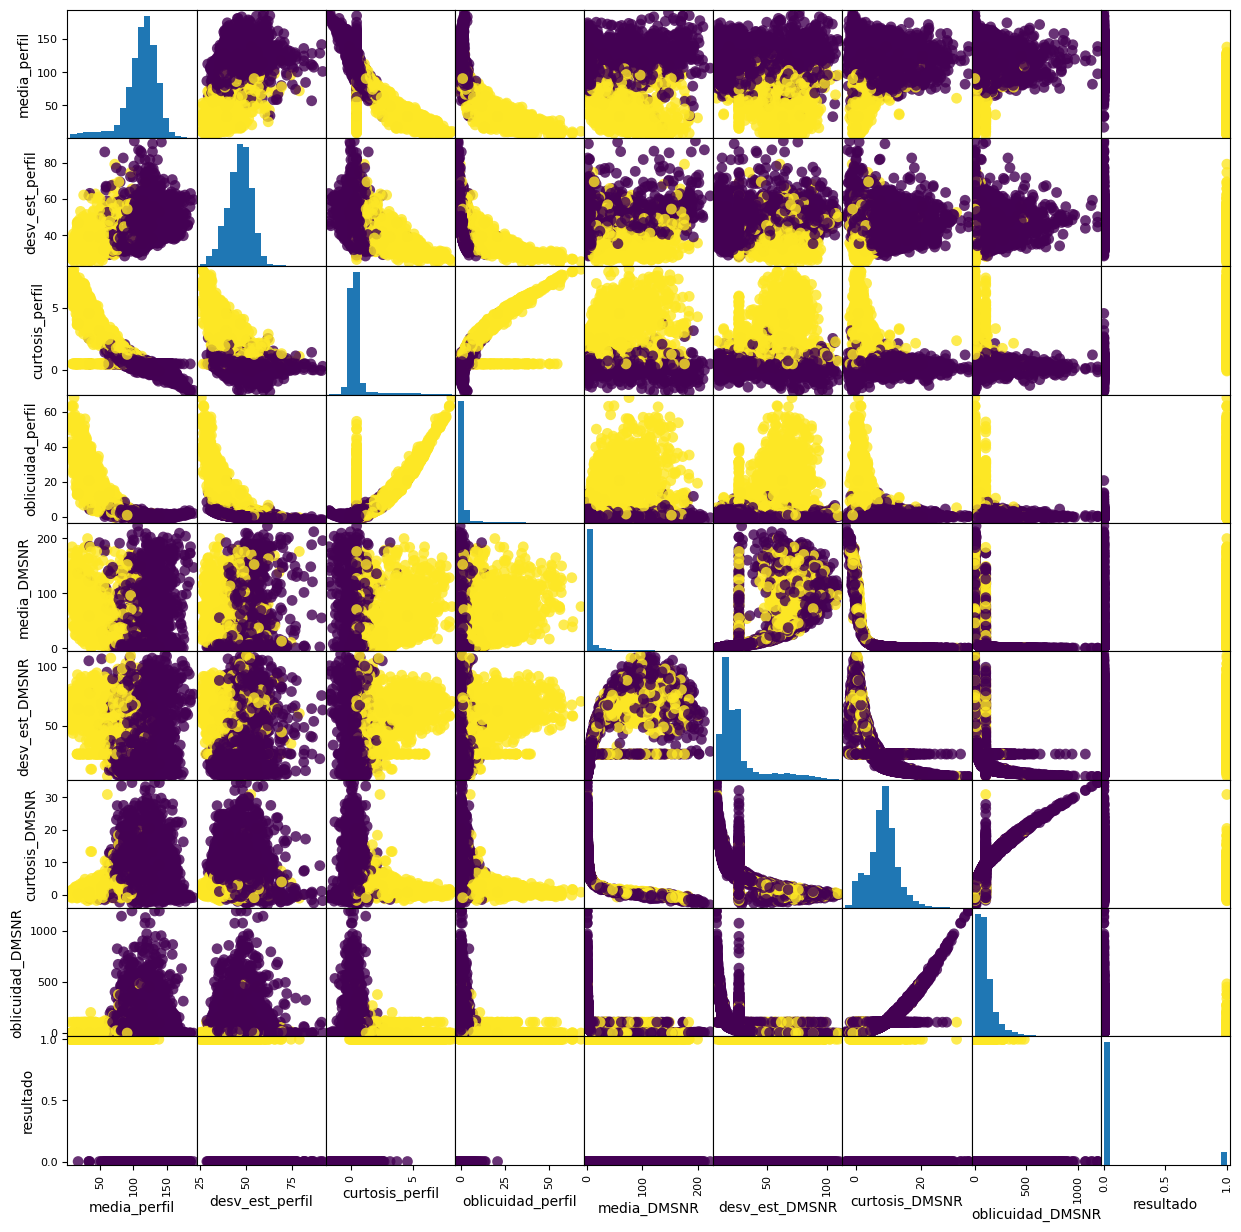

In [20]:
sp = pd.plotting.scatter_matrix(df_2, c=y_data, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Otro método eficaz y muy versatil para encontrar relaciones entre las variables es el uso de la denominada "Matriz de confusión". Existen diversos indices de correlación que determinan el grado de relación de uans variables con otras. El predeterminado es el coeficiente de correlación de Pearson

Obtenemos la matriz de confusión

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

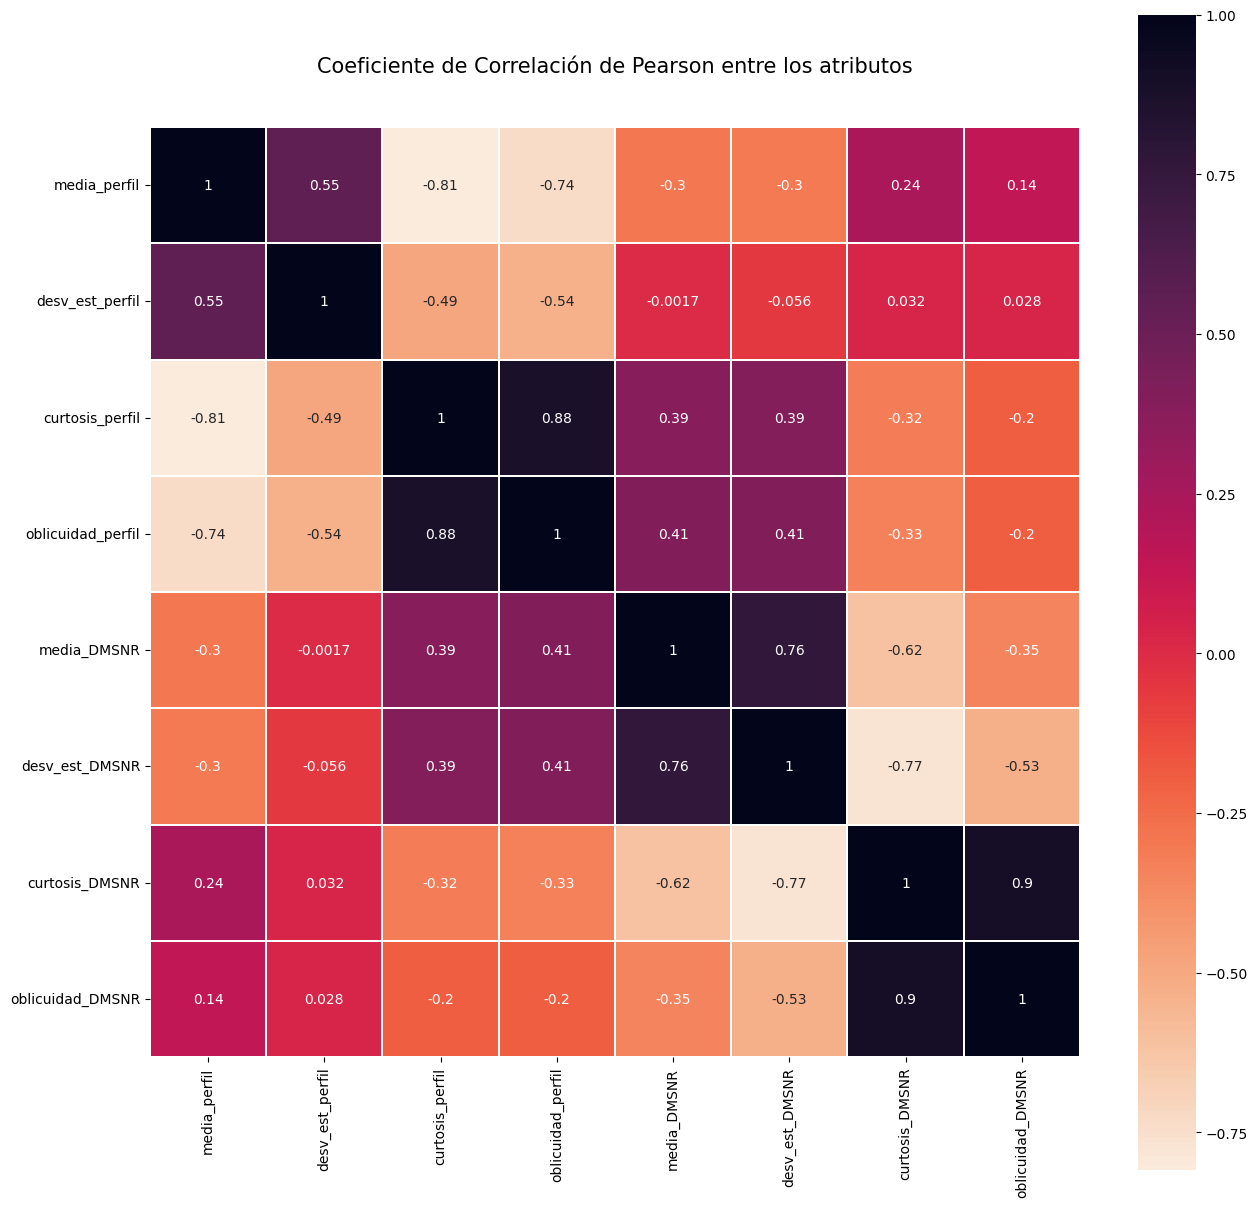

In [22]:
plt.figure(figsize=(15,15))
plt.title('Coeficiente de Correlación de Pearson entre los atributos', y=1.05, size=15)
sns.heatmap(x_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='rocket_r', linecolor='white', annot=True)
plt.show()

Tenemos variables altamente correlacionadas:
* La curtosis de la curva DMSNR con su oblicuidad. 0.9
* La media de la curva DMSNR con su desviación estandar: 0.76
* La curtosis del perfil con su oblicuidad: 0.88

### Normalización

Nuestros datos trabajan con sistemas de medida que tiene sentido para los humanos pero esto puede diferir con la maquina. Para evitar que las predicciones puedan verse afectadas por los sistemas de medida lo ideal es normalizar los datos

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)
x_data=pd.DataFrame(x_data, columns=columnas[:-1])

In [24]:
x_data.describe()

,media_perfil,desv_est_perfil,curtosis_perfil,oblicuidad_perfil,media_DMSNR,desv_est_DMSNR,curtosis_DMSNR,oblicuidad_DMSNR
count,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04
mean,1.795073e-16,-9.559545e-16,-2.722386e-17,1.843282e-17,7.202980e-17,-1.528506e-16,-3.885072e-16,-1.457611e-16
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-4.099024e+00,-3.198061e+00,-2.243058e+00,-5.750967e-01,-4.208269e-01,-1.016910e+00,-2.529489e+00,-1.026947e+00
25%,-3.961836e-01,-6.115768e-01,-4.257561e-01,-3.167701e-01,-3.635082e-01,-6.209488e-01,-5.579029e-01,-6.438299e-01
50%,1.613347e-01,6.022593e-02,-1.908676e-01,-2.537150e-01,-3.337194e-01,-3.607855e-01,2.592993e-02,-1.693726e-01
75%,6.258826e-01,6.554613e-01,-5.617456e-17,-1.362806e-01,-2.452213e-01,6.526786e-03,5.279206e-01,2.889629e-01
max,3.065329e+00,6.659092e+00,7.681693e+00,1.068315e+01,7.083152e+00,4.515923e+00,5.777922e+00,1.036927e+01


### Modelos de Machine Learning

Una vez hechos estos analisis de los datos podemos querer empezar nuestros primeros modelos de aprendizaje automatico. Empezaremos con los arboles de decisión

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model_1 = DecisionTreeClassifier()
model_1.fit(x_data,y_data)

DecisionTreeClassifier()

Los arboles se pueden representar para analizar como se han tomado las decisiones

In [27]:
from sklearn.tree import plot_tree

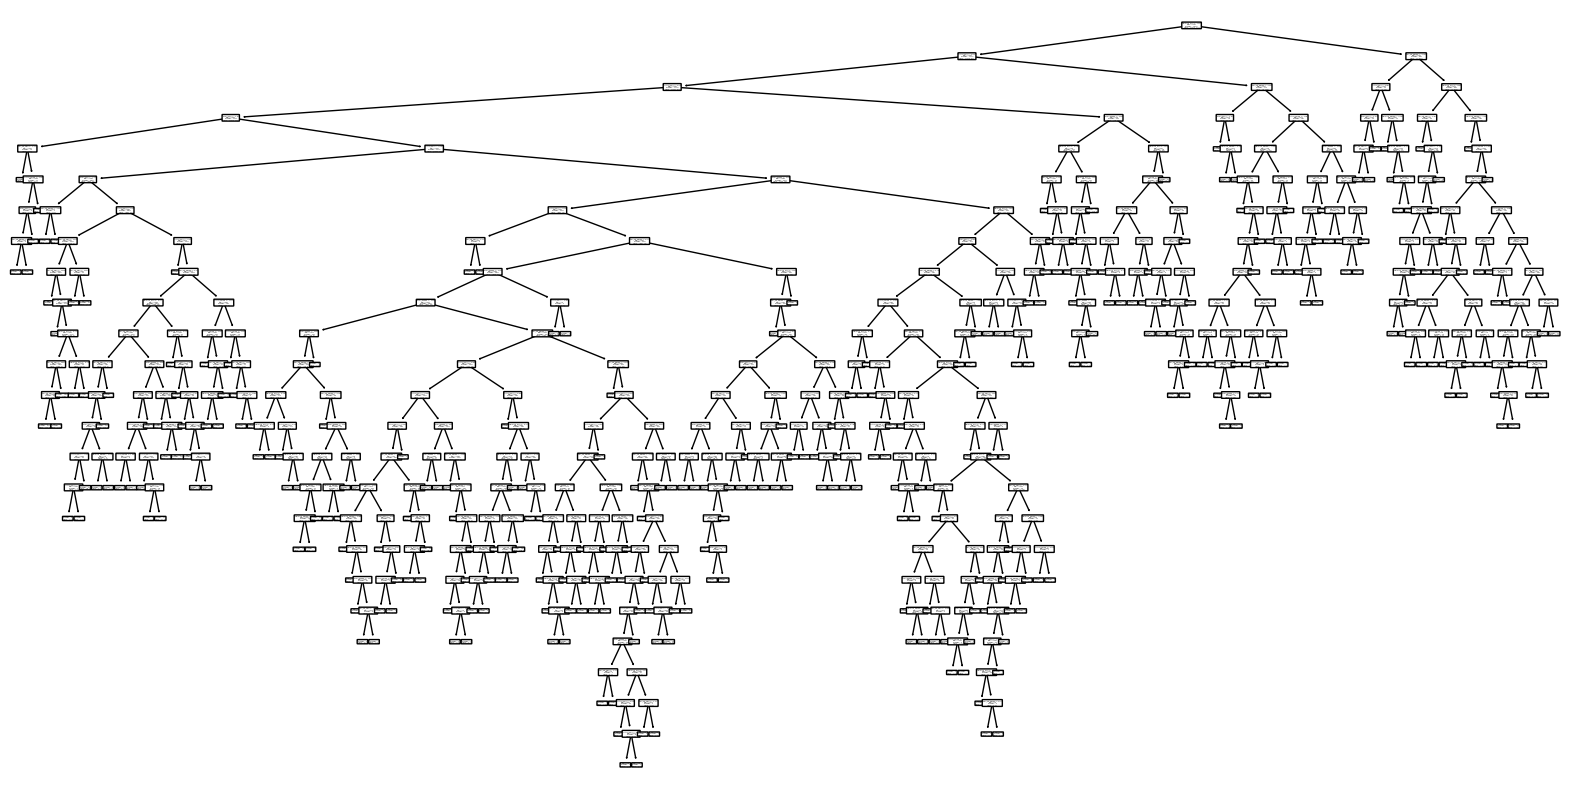

In [28]:
plt.rcParams["figure.figsize"] = (20,10)
plot_tree(model_1,rounded=True,feature_names=atributos)
plt.show()

In [29]:
from sklearn.tree import export_text

In [30]:
model_text = export_text(model_1, feature_names=atributos)
print(model_text)

|--- oblicuidad_perfil <= 0.43
|   |--- curtosis_perfil <= 0.63
|   |   |--- curtosis_perfil <= 0.32
|   |   |   |--- media_perfil <= -1.50
|   |   |   |   |--- desv_est_perfil <= -0.59
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- desv_est_perfil >  -0.59
|   |   |   |   |   |--- curtosis_DMSNR <= -1.64
|   |   |   |   |   |   |--- media_perfil <= -1.59
|   |   |   |   |   |   |   |--- desv_est_DMSNR <= 1.73
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- desv_est_DMSNR >  1.73
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- media_perfil >  -1.59
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- curtosis_DMSNR >  -1.64
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- media_perfil >  -1.50
|   |   |   |   |--- curtosis_perfil <= -0.14
|   |   |   |   |   |--- media_perfil <= -0.78
|   |   |   |   |   |   |--- desv_est_DMSNR <= -0.67
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |  

Existen diversos criterios de selección de atributos para la creación de arboles de decision el predeterminado es el criterio gini, pero también podemos usar la "entropia"

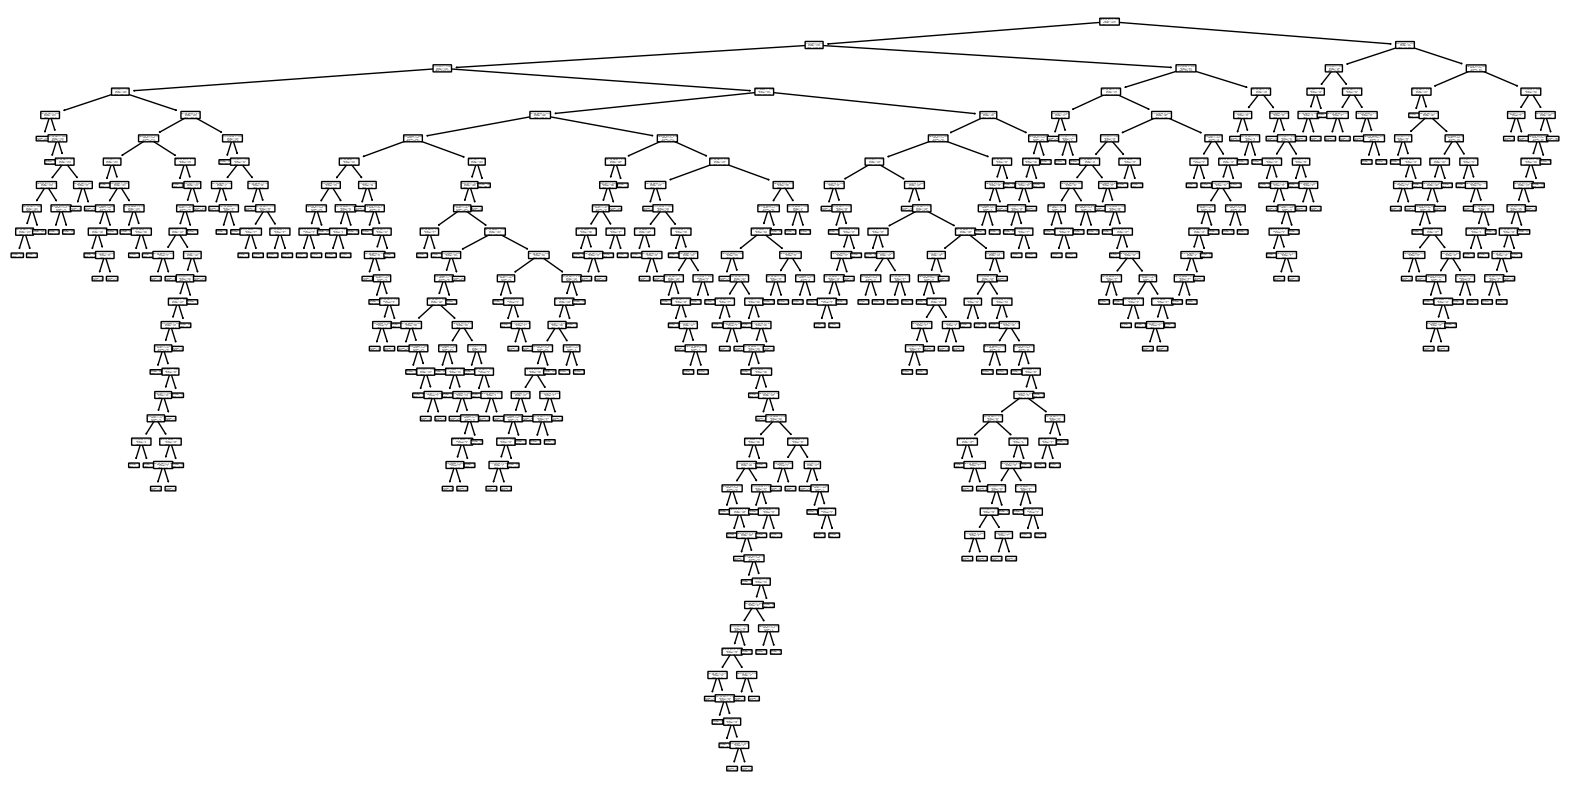

In [31]:
model_2 = DecisionTreeClassifier(criterion='entropy')
model_2.fit(x_data,y_data)
plt.rcParams["figure.figsize"] = (20,10)
plot_tree(model_2,rounded=True,feature_names=atributos)
plt.show()

Tenemos un gran número de divisiones para ajustarse perfectamente a todos los datos del conjunto que le hemos dado, esto puede crear un sobreajuste y para solucionarlo debemos modificar nuestro procedimiento.

### Conjunto de prueba y de entrenamiento

Separamos los datos en conjunto de prueba y de entrenamiento estableciendo que el conjunto de prueba debe ser el 25% del conjunto total. y comprobamos que se ha realizado la separación

In [32]:
from sklearn.model_selection import train_test_split

#Establecemos un random state para que los resultados sean reproduccibles pero podria ser interesente probar con distintos valores para ver como varian los resultados

In [33]:
x_train, x_test, y_train, y_test = \
  train_test_split(x_data,y_data,test_size = 0.25,random_state=4)



Podemos representar la distribución de los datos en los nuevos conjuntos de entrenamiento y prueba para ver como se ha realizado la separación

In [36]:
x_data_visual=x_data.to_numpy()
y_data_visual=y_data.to_numpy()
x_train_visual=x_train.to_numpy()
y_train_visual=y_train.to_numpy()
x_test_visual=x_test.to_numpy()
y_test_visual=y_test.to_numpy()

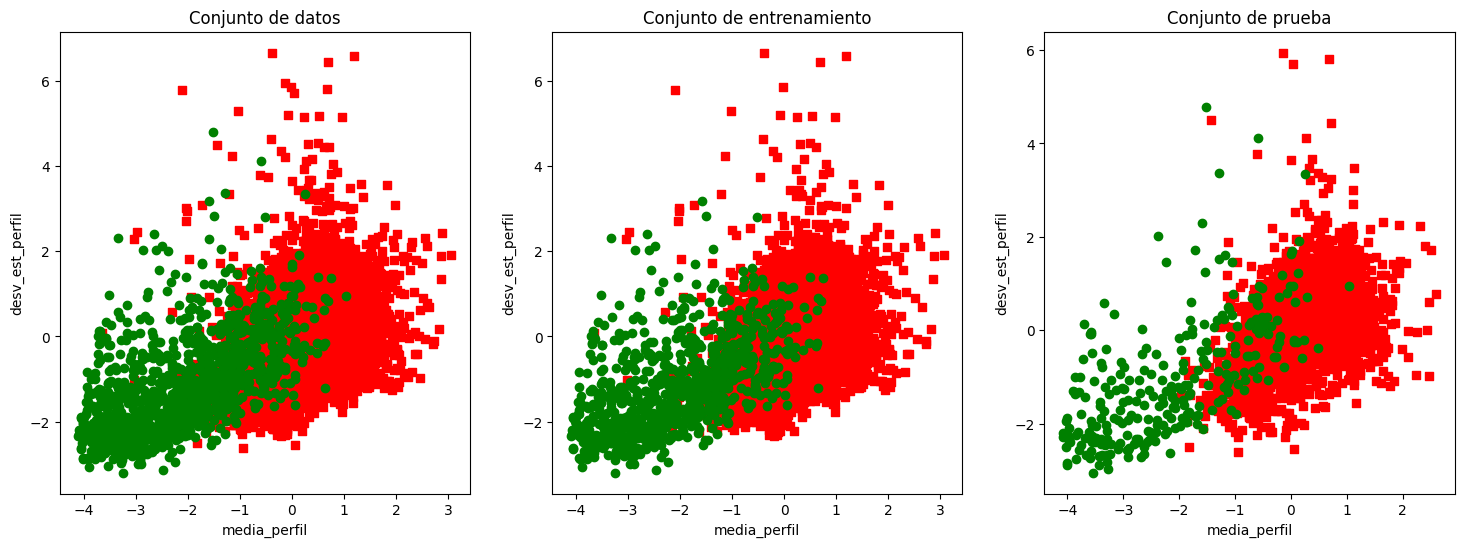

In [37]:
def representacion_grafica(datos,caracteristicas,objetivo,clases,c1,c2):
    for tipo,marca,color in zip(range(len(clases)),"soD","rgb"):
        plt.scatter(datos[objetivo == tipo,c1],
                    datos[objetivo == tipo,c2],marker=marca,c=color)
    plt.xlabel(caracteristicas[c1])
    plt.ylabel(caracteristicas[c2])


plt.rcParams["figure.figsize"] = [18,6]
plt.clf()
splt = plt.subplot(131)

splt.set_title("Conjunto de datos")
representacion_grafica(x_data_visual,x_names,y_data_visual,y_names,0,1)
splt = plt.subplot(132)

splt.set_title("Conjunto de entrenamiento")
representacion_grafica(x_train_visual,x_names,y_train_visual,y_names,0,1)
splt = plt.subplot(133)

splt.set_title("Conjunto de prueba")
representacion_grafica(x_test_visual,x_names,y_test_visual,y_names,0,1)
plt.show()

Ahora que tenemos dos conjuntos podemos realizar el entrenamiento en uno y comprobar los resultados en el otro. Para la comprobación de resultados se entrena el modelo en el conjunto de entrenamiento. Este modelo se utiliza para predecir las variables del conjunto de prueba, ignorando los resultados que ya se conocian, y posteriormente se comparan las predicciones con estos resultados ya conocidos

Entrenamos el modelo en el conjunto de prueba y obten la puntuacion del modelo una vez se aplica al conjunto de entrenamiento


In [38]:
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)
print(model_3.score(x_test,y_test))

0.9636015325670498


Tambien se puede controlar el sobreajuste modificando el numero de muestras minimo para permitir que el arbol cree una separación.

Volvemos a entrenar el modelo pero exigiendo un minimo de 5, 10 y 50 muestras para las separaciones

In [39]:
model_4 = DecisionTreeClassifier(min_samples_split = 5)
model_4.fit(x_train,y_train)
print("precison del modelo en el en el entrenamiento: ",model_4.score(x_train,y_train))
print("precision del modelo en el test",model_4.score(x_test,y_test))

precison del modelo en el en el entrenamiento:  0.9969135802469136
precision del modelo en el test 0.9661558109833972


In [40]:
model_5 = DecisionTreeClassifier(min_samples_split = 10)
model_5.fit(x_train,y_train)
print("precison del modelo en el en el entrenamiento: ",model_5.score(x_train,y_train))
print("precision del modelo en el test",model_5.score(x_test,y_test))

precison del modelo en el en el entrenamiento:  0.9931885908897403
precision del modelo en el test 0.9674329501915708


In [41]:
model_6 = DecisionTreeClassifier(min_samples_split = 50)
model_6.fit(x_train,y_train)
print("precison del modelo en el en el entrenamiento: ",model_6.score(x_train,y_train))
print("precision del modelo en el test",model_6.score(x_test,y_test))

precison del modelo en el en el entrenamiento:  0.9846743295019157
precision del modelo en el test 0.9715836526181354


Podemos observa, que aunque en el último modelo la precisión en el entrenamiento sea más baja, la que nos interesa, frente a las nuevas instancias (test) es más alta. Este último modelo por lo tanto, es el más adecuado de los tres

Otro parametro que se puede ajustar es la profundidad maxima del arbol

Creamos un arbol de profundidad maxima = 4

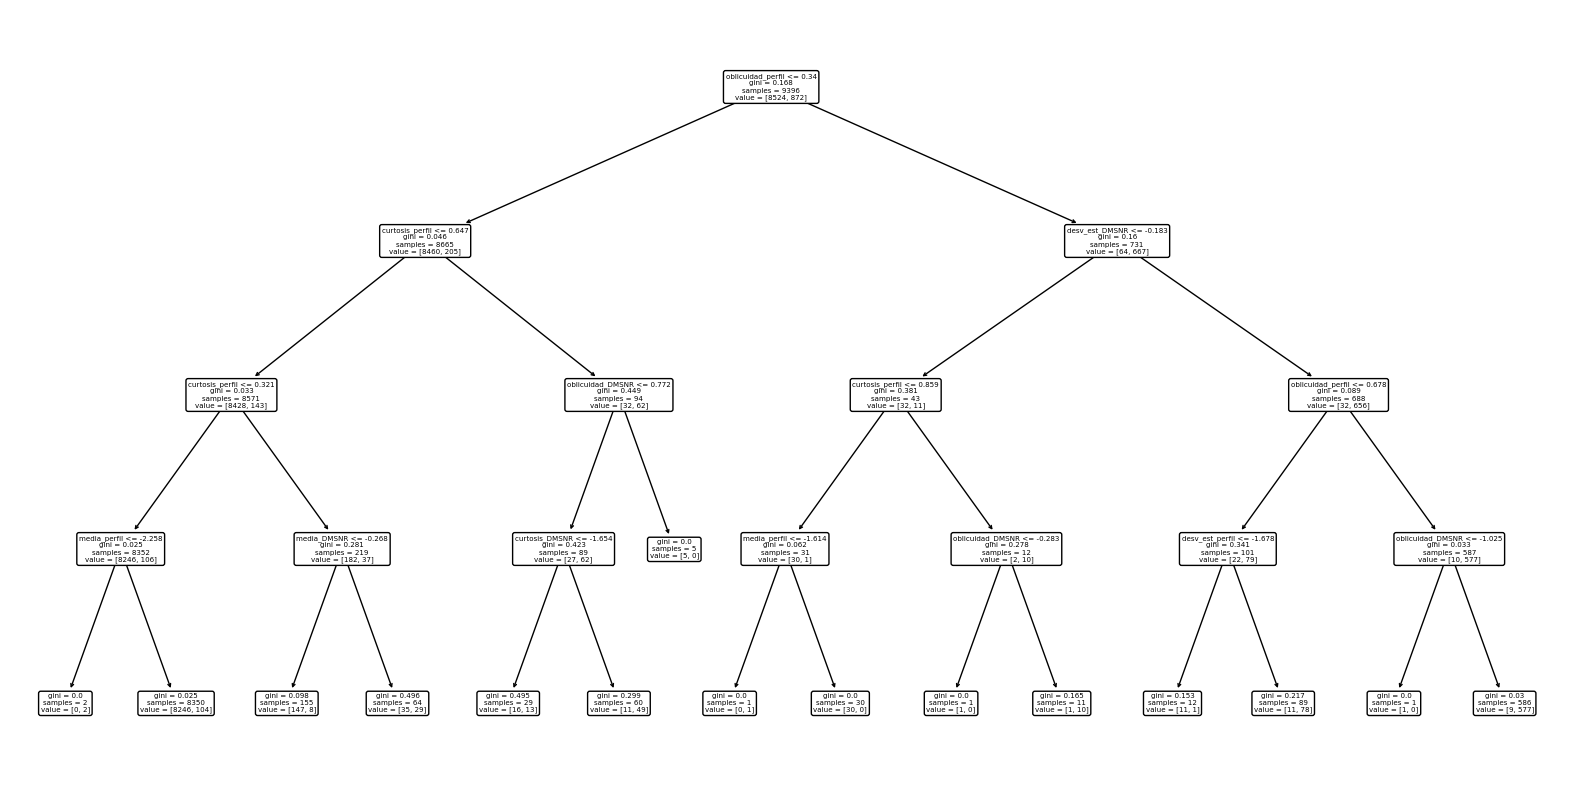

In [42]:
model_7=DecisionTreeClassifier(max_depth=4)
model_7.fit(x_train, y_train)
plt.rcParams["figure.figsize"] = (20,10)
plot_tree(model_7,rounded=True,feature_names=atributos)
plt.show()

### RandomForest

Otro metodo es el RandomForest, donde se crean numerosos arboles y se comparan para obtener una predicción promedio. Además a veces para encontrar los parametros optimos es conveniente definir una función que nos da la puntuación del modelo o el valor del error para distintas opciones de los parametros

Se puede usar el error absoluto medio como la diferencia de cada valor a la predicción y dividir esta diferencia entre el numero total de datos

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [44]:
forest_1 = RandomForestClassifier()
forest_1.fit(x_train,y_train)
predicciones_forest_1= forest_1.predict(x_test)
mean_absolute_error(y_test, predicciones_forest_1)

0.02234993614303959

Para comparar diversos modelos rapidamente se puede definir una función que facilmente nos de el error absoluto medio

In [45]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model =  RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    predicciones = model.predict(val_X)
    mae = mean_absolute_error(val_y, predicciones)
    return(mae)

dado nodos_maximos = [2,5,10,50] obtenemos el error absoluto medio

In [46]:
nodos_maximos = [2,5,10,20]
for max_leaf_nodes in nodos_maximos:
    my_mae = get_mae(max_leaf_nodes,x_train,x_test,y_train,y_test)
    print("nodos máximos: %d  \t\t Error absoluto medio:  %f" %(max_leaf_nodes, my_mae))

nodos máximos: 2  		 Error absoluto medio:  0.032248
nodos máximos: 5  		 Error absoluto medio:  0.025862
nodos máximos: 10  		 Error absoluto medio:  0.024585
nodos máximos: 20  		 Error absoluto medio:  0.023308


### Reducción de dimensiones

Finalmente y volviendo al punto donde se realizó la matrix de confusión podemos tener en cuenta algunos detalles. 

* Si algunas variables estan altamente correlacionadas quiere decir que la información que tiene una puede estar implicita dentro de otra.
* Eliminar variables altamente correlacionadas puede minimizar el tiempo de calculo o el tamaño de almacenamiento para grandes volumenes de datos sin afectar signficativamente a la precisión
* Algunas variables donde teniamos datos ausentes estan altamente correlacionadas con otras variables donde no habia datos ausentes. Puede ser interesente eliminar estas columnas. Si hay que eliminar una de las dos mejor hacerlo en la que faltaban datos que en la que estaba completa

Eliminamos las columnas referentes a la curtosis del perfil integrado, la oblicuidad de la curva DMSNR y la desviación estandar de la curva DMSNR

In [47]:
x_train_reduced=x_train.drop(['curtosis_perfil','desv_est_DMSNR','oblicuidad_DMSNR'], axis=1)
x_test_reduced =x_test.drop(['curtosis_perfil','desv_est_DMSNR','oblicuidad_DMSNR'], axis=1)
x_train_reduced.head()

,media_perfil,desv_est_perfil,oblicuidad_perfil,media_DMSNR,curtosis_DMSNR
11281,-0.078319,-0.351388,-0.246778,-0.319997,-0.175438
6675,0.916510,0.244657,-0.286264,-0.320562,-0.003421
11846,0.862341,0.419602,-0.275794,-0.300260,-0.220076
568,0.461853,0.548089,-0.299990,3.521345,-1.980084
9989,1.054064,0.207898,-0.332170,-0.317569,-0.296463


Aplicamos random forest calculando el error para nodos_maximos = [2,5,10,20] en el conjunto de datos reducido

In [48]:
nodos_maximos = [2,5,10,20]
for max_leaf_nodes in nodos_maximos:
    my_mae = get_mae(max_leaf_nodes,x_train_reduced,x_test_reduced,y_train,y_test)
    print("nodos máximos: %d  \t\t Error absoluto medio:  %f" %(max_leaf_nodes, my_mae))

nodos máximos: 2  		 Error absoluto medio:  0.037037
nodos máximos: 5  		 Error absoluto medio:  0.029693
nodos máximos: 10  		 Error absoluto medio:  0.026181
nodos máximos: 20  		 Error absoluto medio:  0.026501


### Matriz de confusión

La última medida del error que vamos a ver es la matriz de confusión.

la matriz de confusión es una medida que se tiende a usar en clasificadores para analizar el grado de precisión. La idea general es contar el numero de veces que una entrada de clase A ha sido clasificada como clase B, para hacer la matriz de confusión es necesario tener un set de preddiciones que podamos comparar con los resultados reales.

las filas representan la clase real las columnas representan la clase asignada. Por lo tanto los resultados correctos son los que encontramos la diagonal

los elementos de la matriz representan lo siguiente: 

 * 11  representa los datos que fuero clasificados como no pulsares y efectivamente no lo son "TN"

 * 12 representa los que fueron clasificados como pulsares y no lo son "FP"

 * 21 representa los que fueron clasificados como no pulsares y son pulsares, "FN"

 * 22 representa los que fueron clasificados como pulsares y son pulsares "TP"

Guardamos en una variable las predicciones de un random forest con 20 nodos maximos y estado aleatorio =1 despues de haber reducido dimensiones 

In [49]:
forest_final = RandomForestClassifier(max_leaf_nodes = 20, random_state= 1)
forest_final.fit(x_train_reduced,y_train)
predicciones_forest_final= forest_final.predict(x_test_reduced)

Realizamos la matriz de confusión para las predicciones obtenidas anteriormente


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

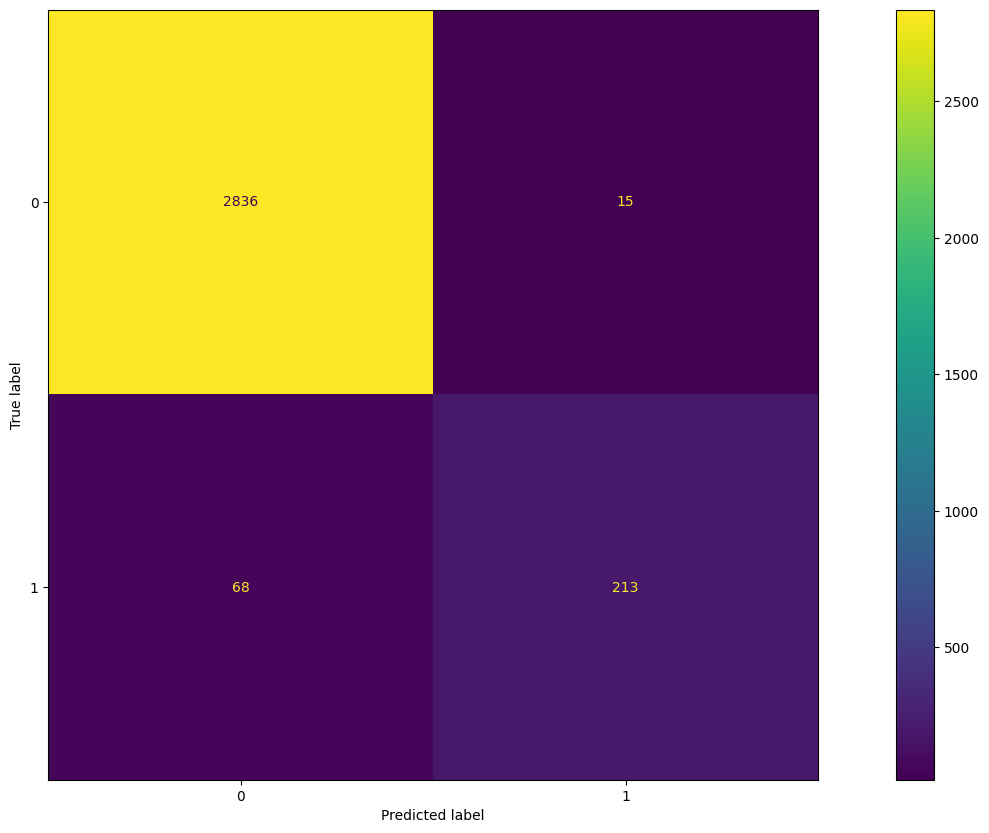

In [51]:
cm = confusion_matrix(y_test,predicciones_forest_final)
disp = ConfusionMatrixDisplay(cm).plot()

Tambien podemos ver diversas medidas relacionadas con la validez de nuestros resultados con "clasification_report", donde se nos mostrará para cada clase, en este caso si es pulsar o no, un resumen de las distintas medidas de precisión, sensibilidad,  tasa FP y medida F_1 

Por otro lado podemos seleccionar una medida en particular que nos interese, como ejemplo se muestra el acierto: cantidad de predicciones que corresponden exactamente a la clase

In [52]:
from sklearn.metrics import accuracy_score, classification_report

forest_final_full = RandomForestClassifier(max_leaf_nodes = 20, random_state= 1)
forest_final_full.fit(x_train,y_train)
predicciones_forest_final_full= forest_final_full.predict(x_test)


print("accuracy=",accuracy_score(y_test, predicciones_forest_final_full))

print(classification_report(y_test,predicciones_forest_final_full))

accuracy= 0.9766922094508301
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2851
         1.0       0.94      0.79      0.86       281

    accuracy                           0.98      3132
   macro avg       0.96      0.89      0.92      3132
weighted avg       0.98      0.98      0.98      3132



In [53]:
from sklearn.metrics import accuracy_score, classification_report

print("accuracy=",accuracy_score(y_test, predicciones_forest_final))

print(classification_report(y_test,predicciones_forest_final))


accuracy= 0.973499361430396
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2851
         1.0       0.93      0.76      0.84       281

    accuracy                           0.97      3132
   macro avg       0.96      0.88      0.91      3132
weighted avg       0.97      0.97      0.97      3132



Vamos a analizar con un poco de detalle estos resultados.

1. Los resultados entre el modelo con caracteristicas reducidas o el modelo completo no son muy dispares. La precisión solo disminuye 0.01, la sensibilidad 0.03 y la puntuación f1 0.02.

* Si lo que queremos es predecir pulsares: la medida más alta es la percisión, con un 0.93. Esto prioriza que los pulsares clasificados realmente lo sean, aunque algunos posibles pulsarés se queden fuera de la clasificación. 

* La sensibilidad (recall) nos dice la capacidad del modelo de que entren todos los positivos posibles sin que se queden fuera, aunque algunas instancias clasificadas como positiovos sean falsos positivos. 


Si estamos interesados en que aumente la sensibilidad podemos modificar el umbral del arbol para que considere una probabilidad menor de pertenecer a la clase positiva como clase positiva. Por ejemplo, si anteriormente solo se asignaba clase positiva a los que tenian una probabilidad del 50% de serlo, modificarlo para que acepte un 40%

In [54]:
forest_recall = RandomForestClassifier(max_leaf_nodes = 10, random_state= 1)
forest_recall.fit(x_train_reduced,y_train)

#en vez de predicir la clase prededimos la probabilidad de que sea de la clase 1
probas = forest_recall.predict_proba(x_test_reduced)


umbral=0.1 #umbral de probabilidad para clasificar como clase 1
predicciones_recall = (probas[:, 1] >= umbral).astype(int)

print("accuracy=",accuracy_score(y_test, predicciones_recall))

print(classification_report(y_test,predicciones_recall))

accuracy= 0.9626436781609196
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2851
         1.0       0.77      0.84      0.80       281

    accuracy                           0.96      3132
   macro avg       0.88      0.91      0.89      3132
weighted avg       0.96      0.96      0.96      3132



Hay que disminuir notablemente el umbral para empezar a apreciar cambios en la sensibilidad, sin embargo esto produce que la precisión disminuya notablemente

La decisión final sobre que modelo es más conveniente depende de los objetivos del entrenamiento y los intereses que se tengan sobre el mismo

este modelo final lo probaremos a continuación con el mismo conjunto de datos preprocesado de distintas maneras, por lo que será conveniente hacer una función

In [55]:
def entrenamiento_random_forest(df):
  x, y, x_names, y_names = \
      df.iloc[:,0:8], df['resultado'], atributos, valores_clasificacion
  

  x_train, x_test, y_train, y_test = \
    train_test_split(x,y,test_size = 0.25,random_state=4)
  
  forest = RandomForestClassifier(max_leaf_nodes = 20, random_state= 1)
  forest.fit(x_train, y_train)
  predicciones_forest= forest.predict(x_test)
  
  print("accuracy=",accuracy_score(y_test, predicciones_forest))
  
  print(classification_report(y_test,predicciones_forest))

## Entrenamiento con datos nulos predecidos

In [56]:
entrenamiento_random_forest(df_knn)

accuracy= 0.9757343550446999
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2851
         1.0       0.93      0.79      0.85       281

    accuracy                           0.98      3132
   macro avg       0.96      0.89      0.92      3132
weighted avg       0.98      0.98      0.97      3132



Al utilizar un imputador de KNN (K-Nearest Neighbors), se han obtenido resultados ligeramente superiores. El imputador de KNN ha demostrado ser una herramienta eficaz para manejar valores faltantes y mejorar el rendimiento de los modelos de machine learning en este contexto específico.

### Modelo con eliminación de filas con valores nulos

Otra aproximación, es eliminar las filas o atributos con valores nulos. En este caso el porcentaje de instancias con valores nulos para los atributos es muy reducido por lo que perdiariamos demasiada información. 

Por otro lado el conjunto de datos es grande y podemos considerar eliminar las instancias que tienen valores nulos para alguno de sus atributos. Al ser el conjunto de datos grande por eliminar una parte de las instancias no perderemos demasiada información 

df_3 = df.dropna()

In [57]:
df_3 = df.dropna()
df_3.isnull().sum()

media_perfil         0
desv_est_perfil      0
curtosis_perfil      0
oblicuidad_perfil    0
media_DMSNR          0
desv_est_DMSNR       0
curtosis_DMSNR       0
oblicuidad_DMSNR     0
resultado            0
dtype: int64

In [58]:
entrenamiento_random_forest(df_3)

accuracy= 0.981888745148771
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2096
         1.0       0.93      0.87      0.90       223

    accuracy                           0.98      2319
   macro avg       0.96      0.93      0.95      2319
weighted avg       0.98      0.98      0.98      2319



Ahora vamos a probar a usarlo con un método de entrenamiento preparado para conjuntos de datos más pequeños

Si comparamos los resultados obtenidos hasta ahora

0. Modelo Random Forest estandar:  
  Precisión:  0.94  
  Sensibilidad:  0.77  
  F1:  0.86  


1. Modelo Random Forest con caracteristicas reducidas:  
  Precisión:  0.93  
  Sensibilidad:  0.76  
  F1:  0.84  

2. Modelo priorizando sensibilidad:  
  Precisión:  0.77  
  Sensibilidad:  0.84  
  F1:  0.8  

3. Modelo con valores nulos predecidos:  
  Precisión:  0.93  
  Sensibilidad:  0.79  
  F1:  0.85  

4. Modelo con instancias incompletas eliminado:  
  Precisión:  0.93  
  Sensibilidad:  0.87  
  F1:  0.9  

Podemos observar cómo en este caso eliminar las instancias con valores nulos se muestra como mejor opción que tratar de arreglarlas

Sin embargo hay una situación que hemos podido pasar por alto, que en nuestro conjunto de datos tengamos valores nulos en las instancias que queremos predecir, en este caso si debemos hacer una imputación de estos valores ya que no podemos eliminar las instancias que queremos predecir, además debemos saber como se comporta nuestro modelo ante instancias que tienen valores nulos en las predicciones. El cuarto resultado aportado no hace eso por lo que  vamos a simularlo eliminando las instancias con valores nulos del conjunto de entrenamiento pero prediciendolos sobre el conjunto de test

In [59]:
#Separamos conjunto entrenamiento y prueba
train_ni, test_ni = \
  train_test_split(df,test_size = 0.25,random_state=4)

# eliminamos los valores nulos del conjunto de entrenamiento
train_ni=train_ni.dropna()

# separamos en atributos y clase para el entrenamienot
x_train_ni, y_train_ni, x_names, y_names = \
    train_ni.iloc[:,0:8], train_ni['resultado'], atributos, valores_clasificacion

# imputamos los valores nulos del conjunto de prueba con el imputer knn
imputer_knn = KNNImputer(n_neighbors = 2)
test_ni_knn = pd.DataFrame(imputer_knn.fit_transform( X = test_ni[columnas[:-1]]   ) )

columna_resultado = test_ni['resultado'].values


# Volvemos a poner nombre de las columnas y añadimos la columna de predicciones
test_ni_knn.columns = test_ni.columns[:-1]
test_ni_knn['resultado'] = columna_resultado


#Separamos conjunto entrenamiento y prueba del conjunto de prueba imputado
x_test_ni, y_test_ni, x_names, y_names = \
    test_ni_knn.iloc[:,0:8], test_ni_knn['resultado'], atributos, valores_clasificacion

In [60]:
forest = RandomForestClassifier(max_leaf_nodes = 20, random_state= 1)

forest.fit(x_train_ni, y_train_ni)
predicciones_forest_ni= forest.predict(x_test_ni)


print("accuracy=",accuracy_score(y_test_ni, predicciones_forest_ni))

print(classification_report(y_test_ni,predicciones_forest_ni))

accuracy= 0.9747765006385696
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2851
         1.0       0.92      0.78      0.85       281

    accuracy                           0.97      3132
   macro avg       0.95      0.89      0.92      3132
weighted avg       0.97      0.97      0.97      3132



0. Modelo Random Forest estandar:  
  Precisión:  0.94  
  Sensibilidad:  0.77  
  F1:  0.86  


1. Modelo Random Forest con caracteristicas reducidas:  
  Precisión:  0.93  
  Sensibilidad:  0.76  
  F1:  0.84  

2. Modelo priorizando sensibilidad:  
  Precisión:  0.77  
  Sensibilidad:  0.84  
  F1:  0.8  

3. Modelo con valores nulos predecidos:  
  Precisión:  0.93  
  Sensibilidad:  0.79  
  F1:  0.85  

4. Modelo con instancias incompletas eliminado:  
  Precisión:  0.93  
  Sensibilidad:  0.87  
  F1:  0.9  

5. Modelo eliminando instancias incompletas en el entrenamiento y evaluado sobre test con datos nulos imputados  
  Precisión: 0.92  
  Sensibilidad: 0.78  
  F1: 0.85  

Se puede observar que entrenar el modelo sobre un conjunto de entrenamiento en el que se han eliminado las instancias con datos nulos y aplicandolo a un conjunto donde si tenemos datos nulos y debemos imputarlos, obtenemos resultados más bajos que imputando con media o tratando de predecir estos valores nulos de las instancias (modelos 0, 1 y 3). Por lo que en promedio podemos decir que estos son los mejores modelos obtenidos